# Business Understanding

## Objective


## Description

In [48]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Data Understanding

## Import Libraries

In [4]:
# Handle table-like data and matrices
import numpy as np
import pandas as pd

# Modeling Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Modelling Helpers
from sklearn.preprocessing import Imputer, Normalizer, scale
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.feature_selection import RFECV

# visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns

# Configure visualization
#matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 8, 6


## Setup helper Functions

There is no need to understand to this code.

In [43]:
def plot_histograms(df, variables, n_rows, n_cols):
    fig = plt.figure( figsize=(16, 12) )
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows, n_cols, i+1)
        df[ var_name ].hist(bins=10, ax=ax)
        ax.set_title('Skew: ' + str( round( float( df[ var_name].skew()), )))
        ax.set_xticklabels([], visible=False)
        ax.set_yticklabels([], visible=False)
    fig.tight_layout()
    plt.show()

def plot_distribution(df, var, target, **kwargs):
    row = kwargs.get('row', None)
    col = kwargs.get('col', None)
    facet = sns.FacetGrid(df, hue=target, aspect=4, row=row, col=col)
    facet.map(sns.kdeplot, var, shade=True)
    facet.set(xlim=(0, df[var].max()))
    facet.add_legend()

def plot_categories(df, cat, target, **kwargs):
    row=kwargs.get('row', None)
    col=kwargs.get('col', None)
    facet=sns.FacetGrid(df, row=row, col=col)
    facet.map(sns.barplot, cat, target)
    facet.add_legend()
    
def plot_correlation_map(df):
    corr = titanic.corr()
    _, ax = plt.subplots(figsize=(12,10))
    cmap=sns.diverging_palette(220, 10, as_cmap = True)
    _ = sns.heatmap(
        corr,
        cmap=cmap,
        square=True,
        cbar_kws={'shrink' : .9},
        ax=ax,
        annot=True,
        annot_kws={'fontsize' : 12}
    )

## Load Data

In [30]:
train = pd.read_csv("../input/titanic/train.csv")
test = pd.read_csv("../input/titanic/test.csv")
print('train:', train.shape, 'test:', test.shape)

train: (891, 12) test: (418, 11)


In [31]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [32]:

full = train.append(test, ignore_index = True, sort=True)
titanic = full[:891]
del train, test
print('Datasets:', 'full:', full.shape, 'titanic:', titanic.shape)

Datasets: full: (1309, 12) titanic: (891, 12)


In [33]:
## Statistical summaries and visualizations

In [34]:
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


### Look at some key information about the variables

In [35]:
titanic.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.381594,446.000000,2.308642,0.523008,0.383838
std,14.526497,49.693429,0.806057,257.353842,0.836071,1.102743,0.486592
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,446.000000,3.000000,0.000000,0.000000
75%,38.000000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,8.000000,1.000000


### A heat map of correlation

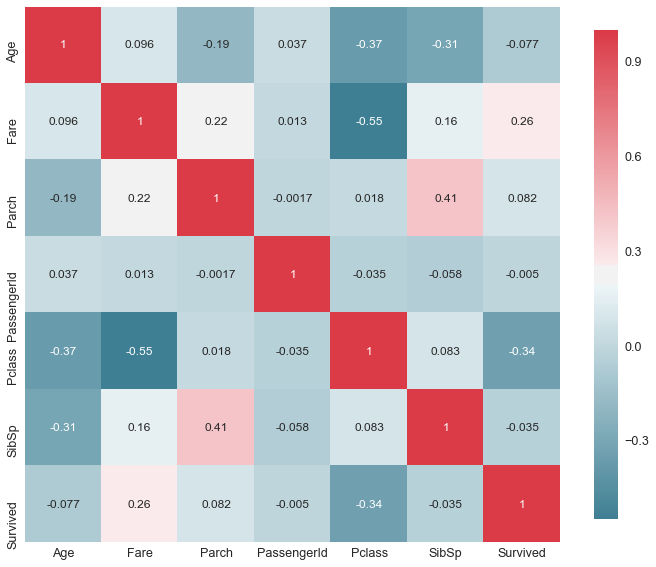

In [39]:
plot_correlation_map(titanic)

### Explore the relationship between the features and survival of passengers

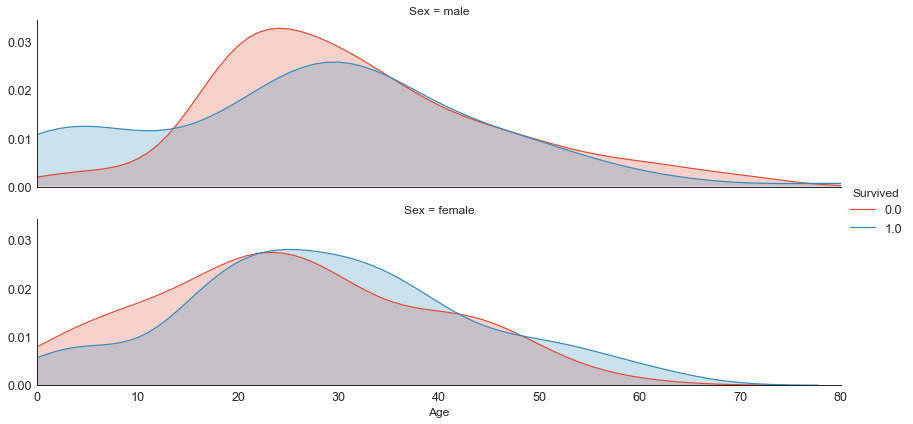

In [44]:
plot_distribution(titanic, var='Age', target='Survived', row='Sex')

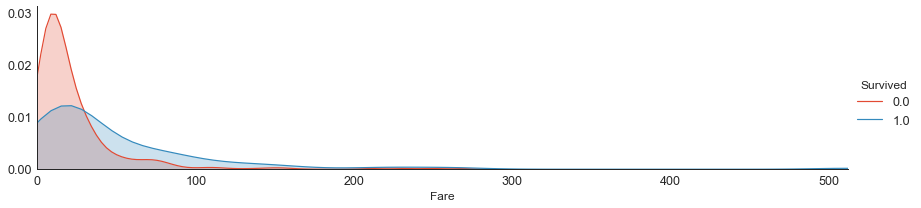

In [45]:
plot_distribution(titanic, var='Fare', target='Survived')

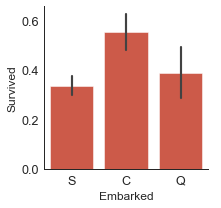

In [49]:
plot_categories(titanic, cat='Embarked', target='Survived')

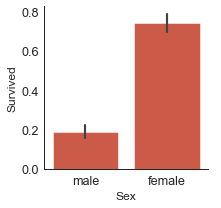

In [50]:
plot_categories(titanic, cat='Sex', target='Survived')

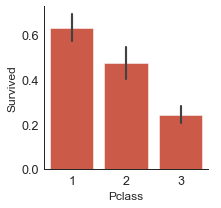

In [51]:
plot_categories(titanic, cat='Pclass', target='Survived')

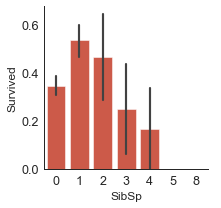

In [52]:
plot_categories(titanic, cat='SibSp', target='Survived')

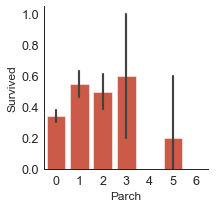

In [53]:
plot_categories(titanic, cat='Parch', target='Survived')